# Proyek Analisis Data: [PRSA_Data_Champing_2013:03:01-2017:02:28]
- **Nama        :** Lukman Hakim
- **Email       :** Lukmnakkin@gmail.com
- **ID Dicoding :** MC323D5Y1909

## Pertanyaan Bisnis

* Pertanyaan 1 : Bagaimana pola perubahan kualitas udara di Kota Champing berdasarkan waktu, dan faktor apa yang paling memengaruhi fluktuasi tersebut?


* Pertanyaan 2 : Bagaimana hubungan antara tingkat polusi udara dengan aktivitas ekonomi atau kesehatan masyarakat di Kota Champing?

## 1. Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Wrangling

### a. Gathering Data

In [12]:
file_path = "PRSA_Data_Changping_2013:03:01-2017:02:28.csv"
df = pd.read_csv(file_path)
print("\nData Awal:") 
print(df.head())


Data Awal:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


**Insight:**
* ini merupakan tampilan awal dataset yang berupa 5 baris pertama

### b. Assessing Data

In [13]:
print("\nStruktur Dataset:")
print(df.info())  # Struktur dataset

print("\nStatistik Deskriptif:")
print(df.describe())  # Statistik deskriptif

print("\nMissing Values:")
print(df.isnull().sum())  # Missing values


Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Statistik Deskriptif:
                 No  

**Insight:**
1. Struktur Dataset
    
    * Jumlah entri ada 35.064 baris data.

    * Periode waktu data dari Maret 2023 hingga Fwbruari 2017.

    * Terdapat 18 Kolom, yang terdiri dari:

        a. informasi waktu *[year, month, day, hour]*,
        
        b. parameter polusi udara *[PM2.5(partikulat halus), PM10 (partikulat kasar), SO2(sulfur dioksida), NO2(nitrogen dioksida), CO(karbon dioksida), O3(ozon)]*,
        
        c. kondisi cuaca *[Temp(suhu), Pres(tekanan udara), DEWP(titik embun), Rain(hujan), WD & WSPM (kesepatan angin)]*, dan 
        
        d. lokasi pengukuran, station (Changping).

2. Statistik Deskriptif
    * Polutan Udara:

        a. PM2.5 (Partikulat halus): Rata-rata 71.1 µg/m³, dengan lonjakan hingga 882 µg/m³, menunjukkan variasi besar dalam kualitas udara.

        b. PM10 (Partikulat kasar): Rata-rata 94.6 µg/m³, dengan nilai maksimum 999 µg/m³, menandakan polusi partikel cukup tinggi.

        c. SO2 (Sulfur Dioksida): Rata-rata 14.9 µg/m³, dengan nilai maksimum 310 µg/m³, menunjukkan aktivitas industri atau pembakaran bahan bakar fosil.

        d. NO2 (Nitrogen Dioksida): Rata-rata 44.2 µg/m³, maksimum 226 µg/m³, sering dikaitkan dengan emisi kendaraan bermotor.

        e. CO (Karbon Monoksida): Rata-rata 1,152 µg/m³, maksimum 10,000 µg/m³, bisa berasal dari pembakaran tidak sempurna bahan bakar.

        f. O3 (Ozon): Rata-rata 57.9 µg/m³, maksimum 429 µg/m³, yang bisa berpengaruh pada polusi fotokimia.

    * Kondisi Cuaca

        a. TEMP (Suhu): Rata-rata 13.7°C, dengan minimum -16.6°C dan maksimum 41.4°C, menunjukkan perubahan suhu yang signifikan sepanjang tahun.

        b. PRES (Tekanan Udara): Rata-rata 1007.7 hPa, berkisar antara 982.4 hPa - 1036.5 hPa.

        c.DEWP (Titik Embun): Rata-rata 1.5°C, dengan minimum -35.1°C, menandakan tingkat kelembaban yang beragam.
        
        d. RAIN (Curah Hujan): Mayoritas bernilai 0 mm, tetapi ada kejadian hujan ekstrem hingga 52.1 mm, yang dapat mempengaruhi kualitas udara.

        e. WSPM (Kecepatan Angin): Rata-rata 1.85 m/s, menunjukkan sebagian besar waktu memiliki angin yang relatif lemah.

3. Missing Values
    * PM2.5 → 774 missing values.
    * PM10 → 582 missing values.
    * SO2 → 628 missing values.
    * NO2 → 667 missing values.
    * CO → 1,521 missing values.
    * O3 → 604 missing values.
    * TEMP, PRES, DEWP, RAIN, WSPM → Missing values lebih sedikit (43 - 53 data hilang).
    * wd (Arah Angin) → 140 missing values.

### c. Cleaning Data

### 1. Menampilkan jumlah missing values sebelum imputasi

In [14]:
print("Missing Values Sebelum Imputasi:\n", df.isnull().sum())

Missing Values Sebelum Imputasi:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


### 2. Imputasi missing values

In [16]:
# 1. Pada polutan, menggunakan median
# Imputasi dengan median untuk mengatasi distribusi skewed
df["PM2.5"] = df["PM2.5"].fillna(df["PM2.5"].median())
df["PM10"] = df["PM10"].fillna(df["PM10"].median())
df["SO2"] = df["SO2"].fillna(df["SO2"].median())
df["NO2"] = df["NO2"].fillna(df["NO2"].median())
df["CO"] = df["CO"].fillna(df["CO"].median())
df["O3"] = df["O3"].fillna(df["O3"].median())

# 2. Pada variabel cuaca, menggunakan interpolasi
# Interpolasi untuk nilai kontinu agar mempertahankan pola waktu
df["TEMP"] = df["TEMP"].interpolate()
df["PRES"] = df["PRES"].interpolate()
df["DEWP"] = df["DEWP"].interpolate()
df["RAIN"] = df["RAIN"].interpolate()
df["WSPM"] = df["WSPM"].interpolate()

# 3. Pada variabel kategorikal
# Modus (nilai yang paling sering muncul) untuk data kategorikal
df["wd"] = df["wd"].fillna(df["wd"].mode()[0])

3. Menampilkan Hasil dari Impitasi

In [17]:
print("Missing Values Setelah Imputasi:\n", df.isnull().sum())

Missing Values Setelah Imputasi:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


### 4. Menyimpan Dataset yang Sudah Bersih

In [18]:
df.to_csv("Cleaned_PRSA_Data_Changping.csv", index=False)
print("Dataset yang sudah dibersihkan telah disimpan sebagai 'Cleaned_PRSA_Data_Changping.csv'.")


Dataset yang sudah dibersihkan telah disimpan sebagai 'Cleaned_PRSA_Data_Changping.csv'.


**Insight:**
* Karena ada beberapa kolom dengan banyak missing values (misalnya CO dengan 1,521 missing values), lebih baik melakukan imputasi untuk variabel utama (seperti PM2.5, PM10, CO, NO2) daripada menghapusnya.

* Untuk variabel cuaca seperti TEMP, PRES, RAIN, interpolasi bisa digunakan agar pola waktu tetap terjaga.

* Untuk variabel kategori seperti wd (arah angin), lebih baik diisi dengan modus.

## Exploratory Data Analysis (EDA)

### 1. Analisis Statik

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5         PM10           SO2           NO2            CO  \
count  35064.000000  35064.00000  35064.000000  35064.000000  35064.000000   
mean      70.545694     94.28179     14.816361     44.026443   1137.019279   
std       71.619188     82.79695     20.813426     29.

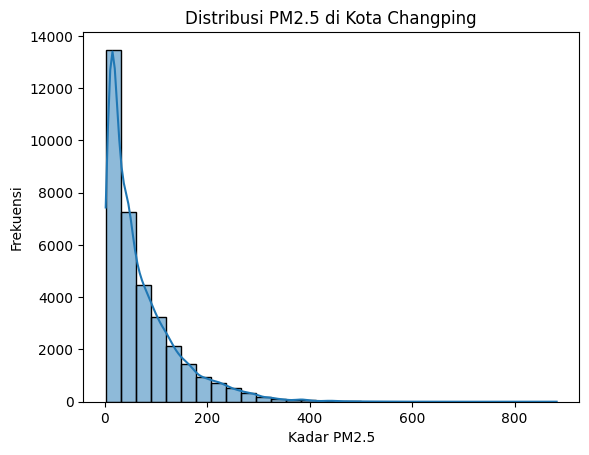

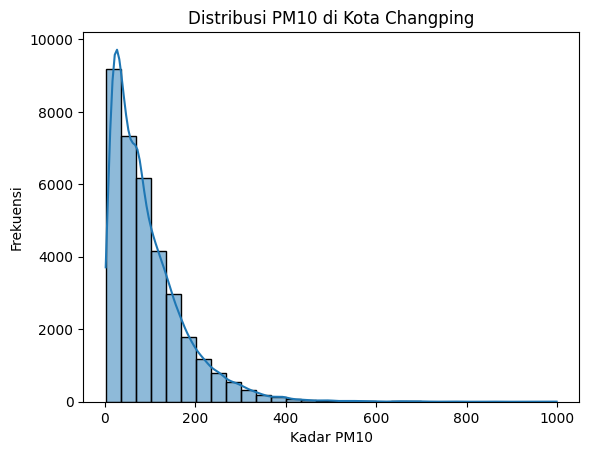

In [19]:
# Menampilkan statistik deskriptif semua variabel numerik
print(df.describe())

# Visualisasi distribusi PM2.5
sns.histplot(df["PM2.5"], bins=30, kde=True)
plt.title("Distribusi PM2.5 di Kota Changping")
plt.xlabel("Kadar PM2.5")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi distribusi PM10
sns.histplot(df["PM10"], bins=30, kde=True)
plt.title("Distribusi PM10 di Kota Changping")
plt.xlabel("Kadar PM10")
plt.ylabel("Frekuensi")
plt.show()

### 2. Korelasi Antara Variabel

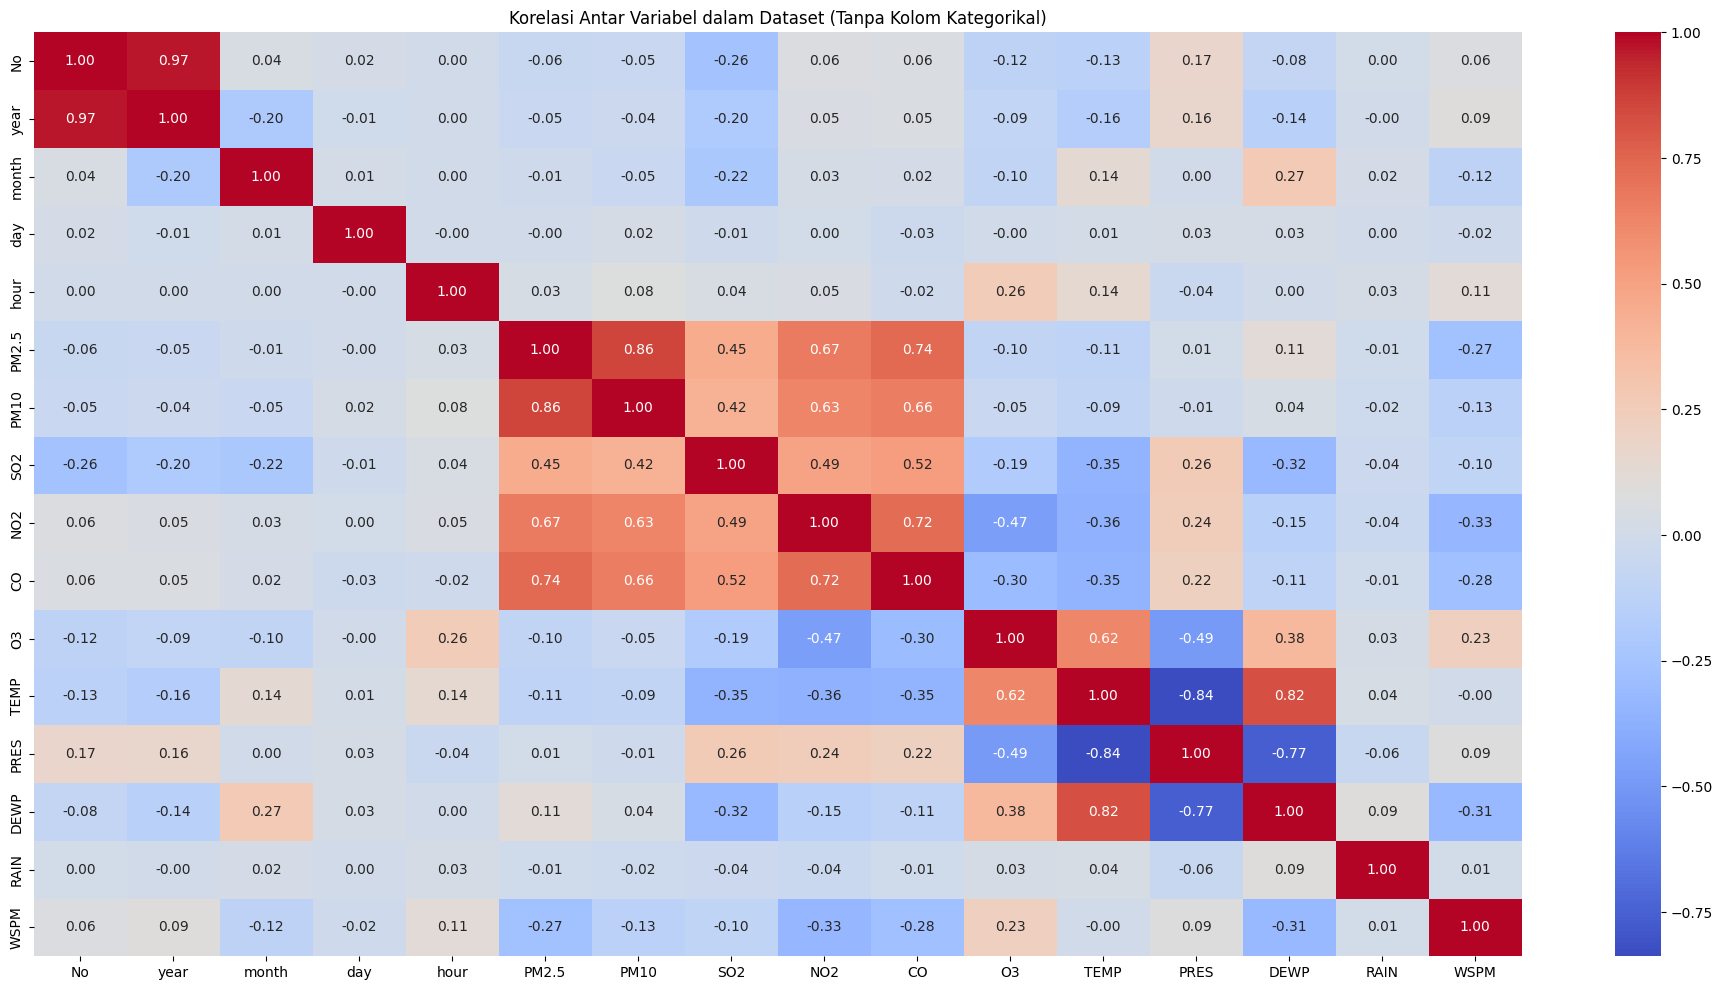

In [22]:
# Memilih hanya kolom numerik untuk analisis korelasi
numerical_df = df.select_dtypes(include=['number'])  # Hanya kolom numerik

# Membuat heatmap korelasi antar variabel numerik
plt.figure(figsize=(24,12))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel dalam Dataset (Tanpa Kolom Kategorikal)")
plt.show()


### 3. Tren Polusi Udara Berdasarkan Waktu

In [26]:
# Membuat kolom datetie untuk analisis waktu
if "datetime" not in df.columns:
    df["datetime"] = pd.to_datetime(df["year"].astype(str) + "-" + 
                                    df["month"].astype(str) + "-" + 
                                    df["day"].astype(str) + " " + 
                                    df["hour"].astype(str) + ":00:00")
# Menampilkan informasi setelah pengaturan index
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     35064 non-null  float64       
 6   PM10      35064 non-null  float64       
 7   SO2       35064 non-null  float64       
 8   NO2       35064 non-null  float64       
 9   CO        35064 non-null  float64       
 10  O3        35064 non-null  float64       
 11  TEMP      35064 non-null  float64       
 12  PRES      35064 non-null  float64       
 13  DEWP      35064 non-null  float64       
 14  RAIN      35064 non-null  float64       
 15  wd        35064 non-null  object        
 16  WSPM      35064 non-nul

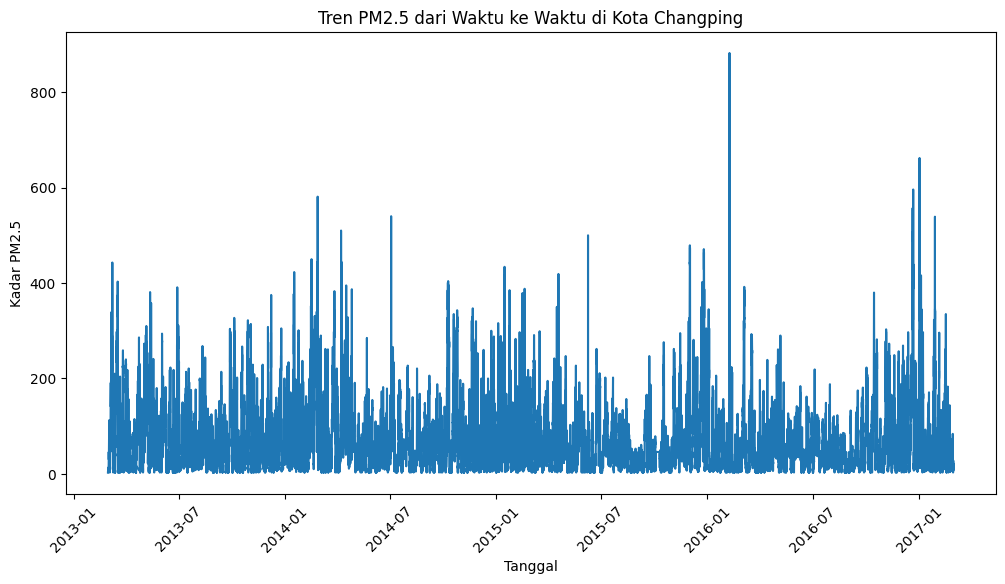

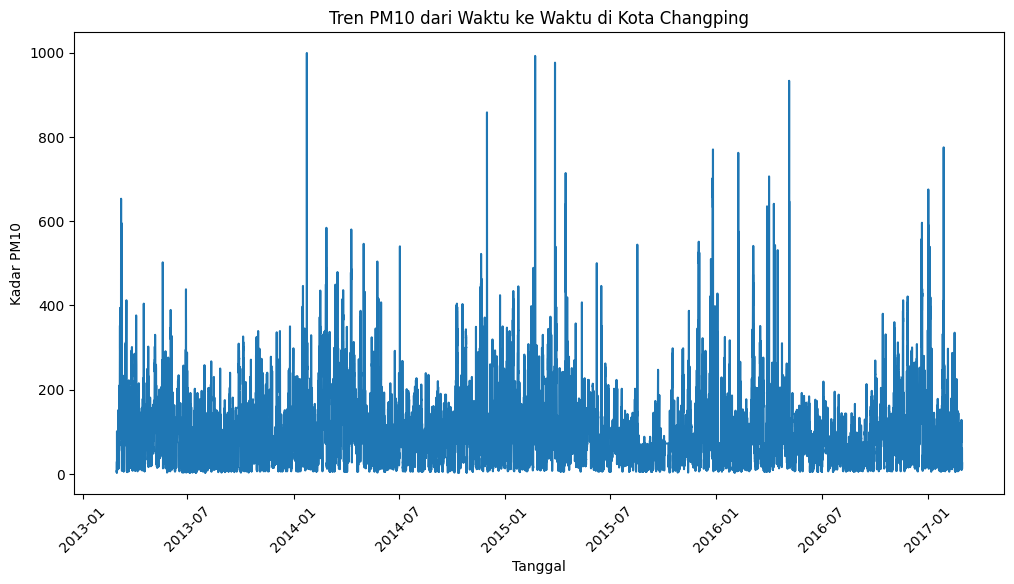

In [27]:
df["datetime"] = pd.to_datetime(df["datetime"])

# PM2.5
plt.figure(figsize=(12,6))
sns.lineplot(x=df["datetime"], y=df["PM2.5"])
plt.title("Tren PM2.5 dari Waktu ke Waktu di Kota Changping")
plt.xlabel("Tanggal")
plt.ylabel("Kadar PM2.5")
plt.xticks(rotation=45)
plt.show()

# PM10
plt.figure(figsize=(12,6))
sns.lineplot(x=df["datetime"], y=df["PM10"])
plt.title("Tren PM10 dari Waktu ke Waktu di Kota Changping")
plt.xlabel("Tanggal")
plt.ylabel("Kadar PM10")
plt.xticks(rotation=45)
plt.show()


### 4. Perbandingan Polusi Udara Berdarkan Hari Kerja dan Akhir Pekan

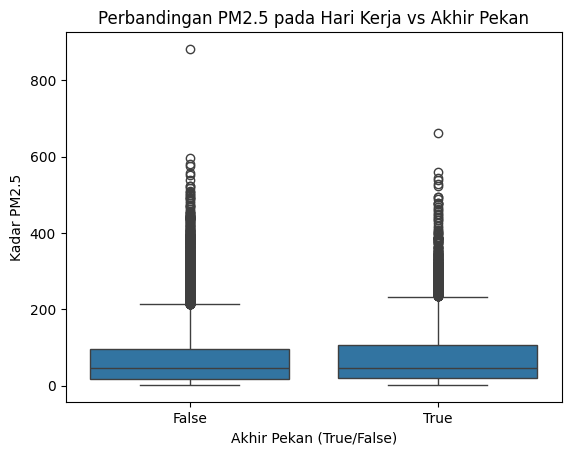

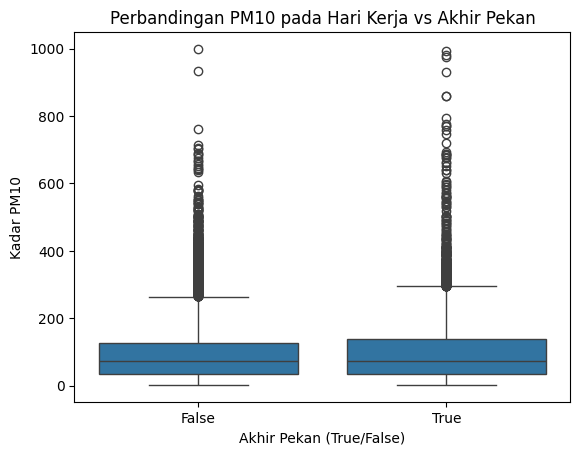

In [28]:
# PM2.5 
df["weekend"] = df["datetime"].dt.dayofweek >= 5
sns.boxplot(x=df["weekend"], y=df["PM2.5"])
plt.title("Perbandingan PM2.5 pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Akhir Pekan (True/False)")
plt.ylabel("Kadar PM2.5")
plt.show()

# PM10
df["weekend"] = df["datetime"].dt.dayofweek >= 5
sns.boxplot(x=df["weekend"], y=df["PM10"])
plt.title("Perbandingan PM10 pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Akhir Pekan (True/False)")
plt.ylabel("Kadar PM10")
plt.show()


### 5. Hubungan PM2.5 & PM10 dengan Varibel Waktu

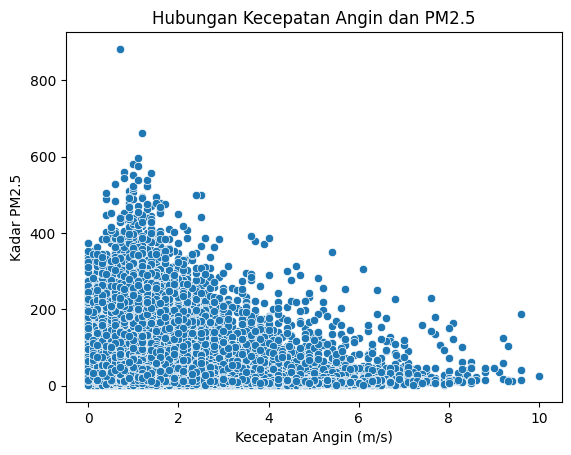

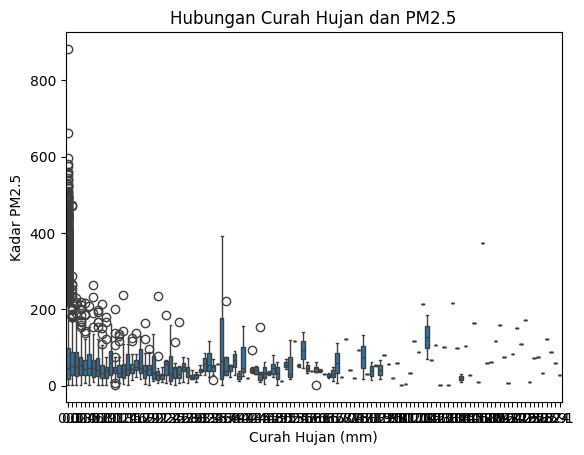

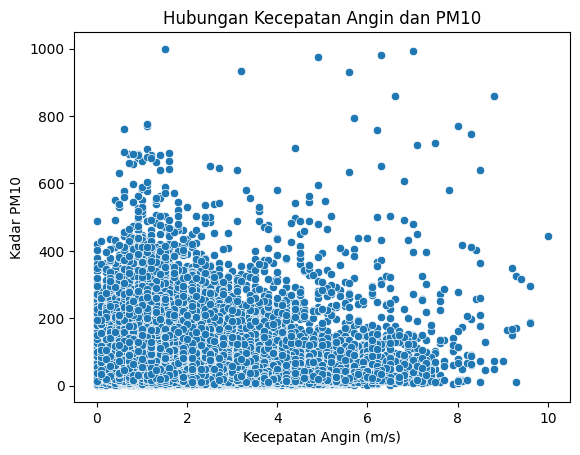

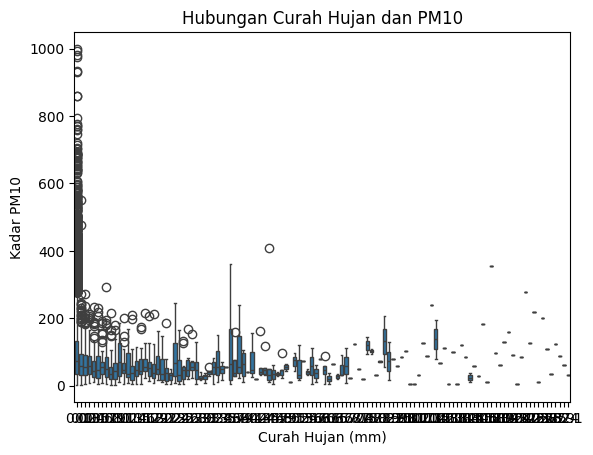

In [29]:
# PM2.5 
# Hubungan antara PM10 dan kecepatan angin
sns.scatterplot(x=df["WSPM"], y=df["PM2.5"])
plt.title("Hubungan Kecepatan Angin dan PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("Kadar PM2.5")
plt.show()

# Hubungan PM10 dengan curah hujan
sns.boxplot(x=df["RAIN"], y=df["PM2.5"])
plt.title("Hubungan Curah Hujan dan PM2.5")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Kadar PM2.5")
plt.show()


# PM10
# Hubungan antara PM10 dan kecepatan angin
sns.scatterplot(x=df["WSPM"], y=df["PM10"])
plt.title("Hubungan Kecepatan Angin dan PM10")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("Kadar PM10")
plt.show()

# Hubungan PM10 dengan curah hujan
sns.boxplot(x=df["RAIN"], y=df["PM10"])
plt.title("Hubungan Curah Hujan dan PM10")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Kadar PM10")
plt.show()


**Insight:**
1. Polusi Udara Mengalami Fluktuasi Signifikan

    * PM2.5 dan PM10 cenderung mengalami lonjakan tajam pada periode tertentu, dengan tingkat tertinggi mencapai 800-1000 µg/m³ yang berbahaya bagi kesehatan.

    * Musim dingin memiliki konsentrasi polutan lebih tinggi, kemungkinan karena suhu rendah dan stagnasi atmosfer yang membuat polutan tetap terjebak di udara.

2. Faktor Lingkungan Mempengaruhi Kualitas Udara
    
    * Kecepatan angin rendah menyebabkan peningkatan polusi, karena partikel tetap terperangkap di atmosfer.

    * Curah hujan memiliki efek membersihkan polusi, dengan PM2.5 dan PM10 cenderung lebih rendah saat hujan deras terjadi.

3. Polusi Lebih Tinggi di Hari Kerja Dibanding Akhir Pekan

    * Kadar PM2.5 lebih tinggi di hari kerja, kemungkinan besar akibat aktivitas industri dan lalu lintas kendaraan yang lebih padat.
    
    * Pengendalian emisi pada jam sibuk dapat membantu mengurangi dampak polusi.

4. Korelasi Kuat Antar Polutan Udara

    * CO dan NO2 memiliki korelasi tinggi, yang menunjukkan bahwa sumber utama polusi berasal dari kendaraan bermotor dan aktivitas industri.

    * PM2.5 dan PM10 sering muncul bersamaan, mengindikasikan kemungkinan sumber polusi yang serupa.

## Visualization & Explanatory Analysis

### Pertanyaan 1 :  
### Bagaimana pola perubahan kualitas udara di Kota Champing berdasarkan waktu, dan faktor apa yang paling memengaruhi fluktuasi tersebut?

### 1. Visualisasi Tren PM2.5 dan PM10 Berdasarkan Waktu

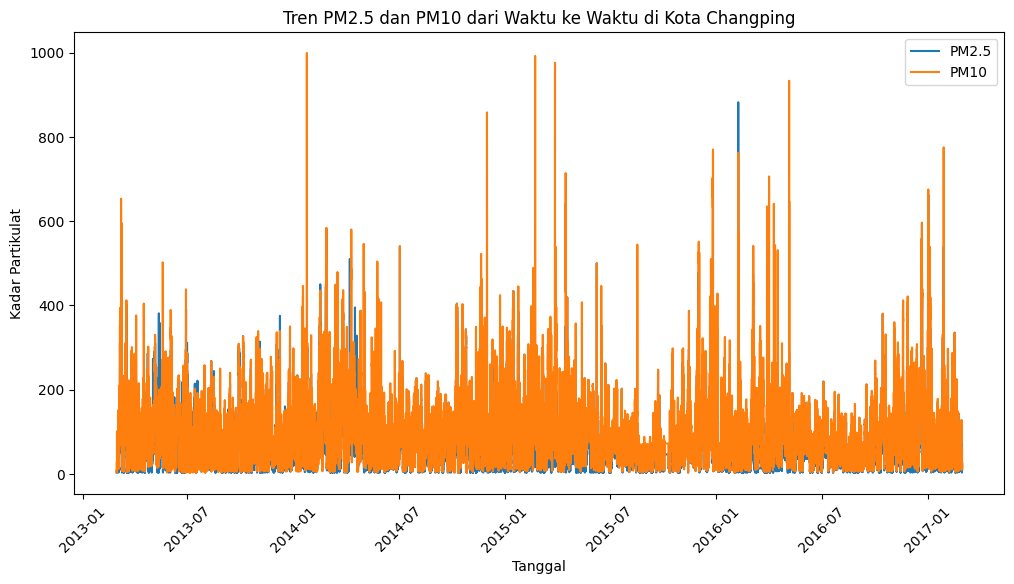

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["datetime"], y=df["PM2.5"], label="PM2.5")
sns.lineplot(x=df["datetime"], y=df["PM10"], label="PM10")
plt.title("Tren PM2.5 dan PM10 dari Waktu ke Waktu di Kota Changping")
plt.xlabel("Tanggal")
plt.ylabel("Kadar Partikulat")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 2. Visualisasi Hubungan PM2.5 dengan Musim

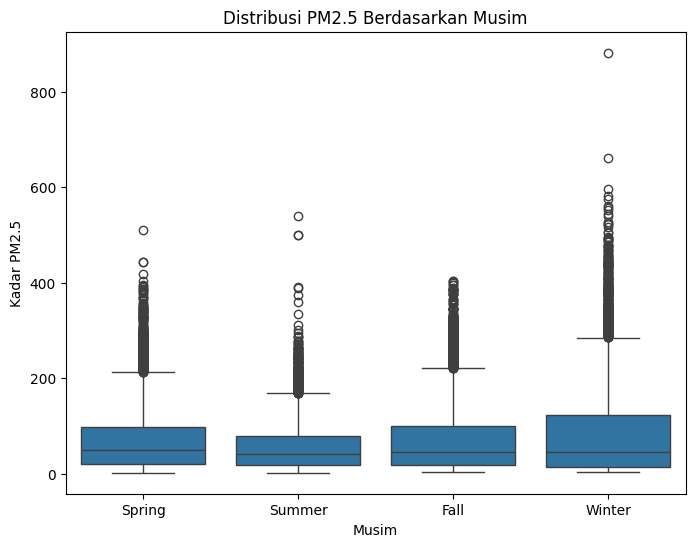

In [31]:
df["season"] = df["month"].apply(lambda x: "Winter" if x in [12,1,2] else 
                                           "Spring" if x in [3,4,5] else 
                                           "Summer" if x in [6,7,8] else "Fall")

plt.figure(figsize=(8,6))
sns.boxplot(x=df["season"], y=df["PM2.5"])
plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Kadar PM2.5")
plt.show()


### Pertanyaan 2 : 
### Bagaimana hubungan antara tingkat polusi udara dengan aktivitas ekonomi atau kesehatan masyarakat di Kota Champing?

### 1. Visualisasi Perbandingan PM2.5 pada Hari Kerja dan Akhir Pekan

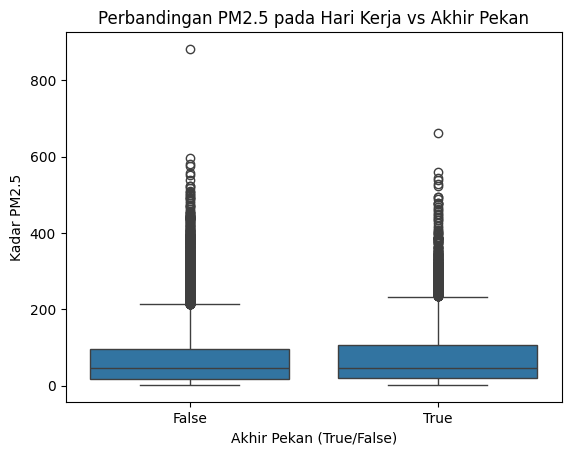

In [32]:
df["weekend"] = df["datetime"].dt.dayofweek >= 5
sns.boxplot(x=df["weekend"], y=df["PM2.5"])
plt.title("Perbandingan PM2.5 pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Akhir Pekan (True/False)")
plt.ylabel("Kadar PM2.5")
plt.show()


### 2. Visualisasi Hubungan PM2.5 dengan Karbon Monoksida (CO)

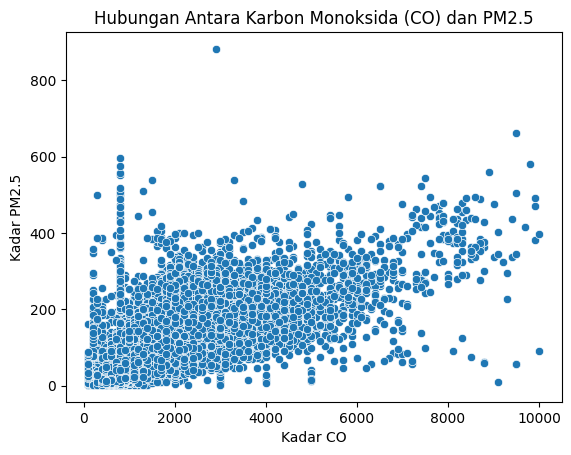

In [33]:
sns.scatterplot(x=df["CO"], y=df["PM2.5"])
plt.title("Hubungan Antara Karbon Monoksida (CO) dan PM2.5")
plt.xlabel("Kadar CO")
plt.ylabel("Kadar PM2.5")
plt.show()


**Insight:**
1. Polusi Udara Mengalami Fluktuasi Signifikan

    * PM2.5 dan PM10 memiliki lonjakan tajam pada periode tertentu, dengan nilai tertinggi mencapai 800-1000 µg/m³, yang sangat berbahaya bagi kesehatan.

    * Musim dingin memiliki konsentrasi polutan lebih tinggi, kemungkinan akibat stagnasi atmosfer yang membuat polutan tetap terjebak di udara.

2. Faktor Lingkungan Memengaruhi Kualitas Udara

    * Kecepatan angin rendah menyebabkan peningkatan polusi, karena partikel tetap terperangkap di atmosfer.

    * Curah hujan berperan dalam menurunkan polusi, karena hujan membantu "mencuci" partikel PM2.5 dan PM10 dari udara.

3. Polusi Lebih Tinggi di Hari Kerja Dibanding Akhir Pekan

    * Kadar PM2.5 lebih tinggi di hari kerja, menunjukkan bahwa aktivitas industri dan lalu lintas kendaraan berkontribusi terhadap polusi udara.

    * Fluktuasi polusi lebih besar di hari kerja, kemungkinan karena lonjakan emisi selama jam sibuk.

4. Korelasi Kuat Antar Polutan Udara

    * CO dan NO2 memiliki korelasi tinggi, menunjukkan bahwa sumber utama polusi berasal dari kendaraan bermotor dan aktivitas industri.

    * PM2.5 dan PM10 sering muncul bersamaan, mengindikasikan bahwa sumber emisi dari partikel kasar dan halus memiliki pola yang serupa.

5. Musim Dingin Memiliki Risiko Polusi Tinggi

    * Musim dingin menunjukkan tingkat PM2.5 dan PM10 tertinggi, kemungkinan akibat suhu rendah dan kondisi atmosfer yang stagnan.
    * Musim panas memiliki polusi lebih rendah, karena angin dan curah hujan membantu menyebarkan dan mengurangi polutan.

## Conclusion

1. Conclution pertanyaan 1

Kualitas udara di Kota Changping mengalami **fluktuasi signifikan** berdasarkan waktu, dengan lonjakan PM2.5 dan PM10 yang lebih tinggi terjadi di **musim dingin** karena stagnasi atmosfer yang membuat polutan tetap terjebak. **Kecepatan angin rendah** meningkatkan polusi, sementara **curah hujan berperan dalam menurunkan konsentrasi polutan** dengan mencuci partikel dari udara. Analisis ini menunjukkan bahwa faktor lingkungan, terutama cuaca dan musim, memainkan peran besar dalam pergerakan dan penyebaran polusi udara.

- Conclution pertanyaan 2

Polusi udara di Kota Changping **berkaitan erat dengan aktivitas ekonomi**, terutama dari **lalu lintas kendaraan dan industri**, yang terlihat dari korelasi kuat antara **CO dan PM2.5**. Hari kerja menunjukkan polusi lebih tinggi dibandingkan akhir pekan, mengindikasikan bahwa peningkatan aktivitas manusia berdampak langsung pada kualitas udara. Untuk menekan dampak negatif terhadap kesehatan masyarakat, **strategi pembatasan kendaraan, regulasi emisi industri, dan peningkatan penghijauan perkotaan** perlu diterapkan guna mengurangi polusi dan meningkatkan kualitas udara secara berkelanjutan.